# Задание

### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  

### 3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def show_plot(df):
    df.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
    print('Зависимость смертности от жесткости воды:')
    plt.show()
    
def calc_pearson(df):
    print('Коэффициент корреляции Пирсона:')
    print(df[['hardness', 'mortality']].corr())
    
def calc_spearman(df):
    print('Коэффициент корреляции Спирмена:')
    print(df[['hardness', 'mortality']].corr(method = 'spearman'))
    
def train_model(df):
    data = df[['hardness']]
    result = df['mortality']
    data_train, data_test, result_train, result_test = train_test_split(
        data, result, test_size = 0.3, random_state = 42
    )
    
    model = LinearRegression()
    model.fit(data_train, result_train)
    
    print('Коэффициент детерминации построенной модели:')
    print(model.score(data_test, result_test))
    
    print('Остатки построенной модели:')
    result_pred = model.predict(data_test)
    residuals = result_test - result_pred
    plt.scatter(result_pred, residuals)
    plt.show()
    
def handle_data(df):   
    show_plot(df)
    calc_pearson(df)
    calc_spearman(df)
    train_model(df)
    
df = pd.read_csv('water.csv')

### Все города

Зависимость смертности от жесткости воды:


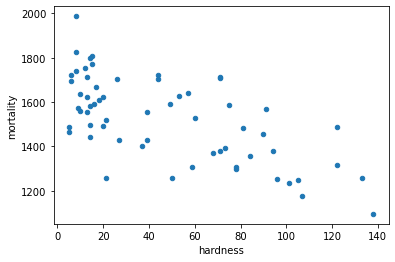

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000
Коэффициент детерминации построенной модели:
0.5046490611017092
Остатки построенной модели:


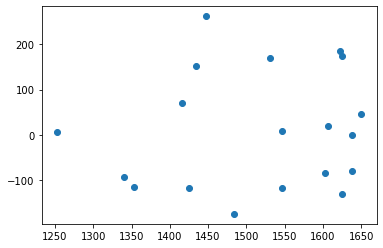

In [2]:
handle_data(df)

Существует средняя обратная корреляция между смертностью и уровнем жесткости воды.
Хаотичное распределение остатков показывает, что модель построена верно.
Коэффициент детерминации 0.5 означает, что модель находится на границе приемлимости к использованию, желательно использовать для предсказания смертности дополнительные параметры, кроме жесткости воды.

### Северные города

Зависимость смертности от жесткости воды:


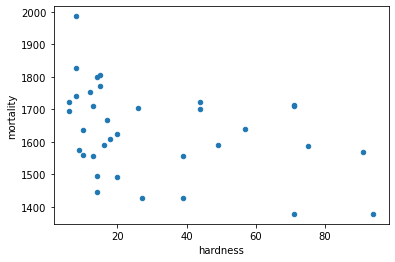

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
Коэффициент детерминации построенной модели:
0.018885304285745863
Остатки построенной модели:


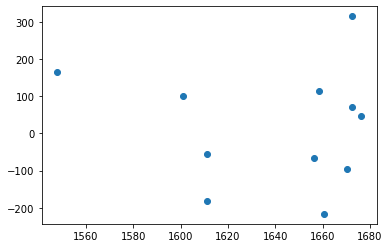

In [3]:
handle_data(df[ df.location == 'North' ])

Существует слабая обратная корреляция между смертностью и уровнем жесткости воды.
Хаотичное распределение остатков показывает, что модель построена верно.
Коэффициент детерминации 0.02 означает, что модель нельзя использовать для предсказания смертности в северных городах, нужно больше данных для тренировки и больше параметров.

### Южные города

Зависимость смертности от жесткости воды:


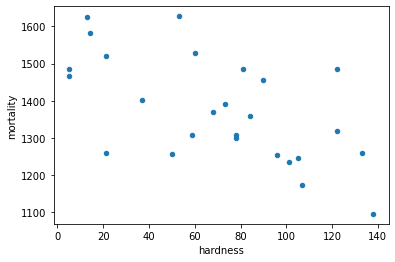

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
Коэффициент детерминации построенной модели:
-2.5519223012352077
Остатки построенной модели:


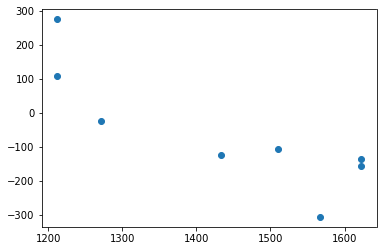

In [4]:
handle_data(df[ df.location == 'South' ])

Существует средняя обратная корреляция между смертностью и уровнем жесткости воды.
Распределение остатков не хаотичное, часто это обозначает, что модель построена неверно, а в данном конкретном случае - слишком мало данных для тренировки и тестирования.
Модель полностью непригодна, о чем нам так же говорит отрицательный коэффициент детерминации.